In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bf41fc3d9425f0dfc6d6dc443c166a5


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | noumea
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | arrifes
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | vila do maio
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | korla
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | minamiashigara
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | igarka
Processing Record 20 of Set 1 | luzhou
Processing Record 21 of Set 1 | comodoro rivadavia
Processing Record 22 of Set 1 | hermanus
Processing 

Processing Record 41 of Set 4 | bonfim
Processing Record 42 of Set 4 | bykovo
Processing Record 43 of Set 4 | gigmoto
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | christchurch
Processing Record 46 of Set 4 | of
City not found. Skipping...
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | moree
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | havre-saint-pierre
Processing Record 1 of Set 5 | salur
Processing Record 2 of Set 5 | strezhevoy
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | gresham
Processing Record 5 of Set 5 | boende
Processing Record 6 of Set 5 | imbituba
Processing Record 7 of Set 5 | kombissiri
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | amapa
Processing Record 10 of Set 5 | raudeberg
Processing Record 11 of Set 5 | chokurdakh
Processing Record 12 of Set 5 | okha
Processing Record 13 of Set 5 | okhotsk
Processing Record 14 of Set 5 | college
Process

Processing Record 30 of Set 8 | iberia
Processing Record 31 of Set 8 | san quintin
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | tutoia
Processing Record 34 of Set 8 | neepawa
Processing Record 35 of Set 8 | miles city
Processing Record 36 of Set 8 | alyangula
Processing Record 37 of Set 8 | afonso bezerra
Processing Record 38 of Set 8 | ransang
Processing Record 39 of Set 8 | sorong
Processing Record 40 of Set 8 | broome
Processing Record 41 of Set 8 | ossora
Processing Record 42 of Set 8 | anshun
Processing Record 43 of Set 8 | abha
Processing Record 44 of Set 8 | gohpur
Processing Record 45 of Set 8 | tamandare
Processing Record 46 of Set 8 | serchhip
Processing Record 47 of Set 8 | naze
Processing Record 48 of Set 8 | champerico
Processing Record 49 of Set 8 | reshetylivka
Processing Record 50 of Set 8 | gazanjyk
Processing Record 1 of Set 9 | malkangiri
Processing Record 2 of Set 9 | harkany
Processing Record 3 of Set 9 | damara
Processing Record 4 of Se

Processing Record 19 of Set 12 | prince rupert
Processing Record 20 of Set 12 | penzance
Processing Record 21 of Set 12 | samarai
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | dabat
Processing Record 24 of Set 12 | sompeta
Processing Record 25 of Set 12 | port lavaca
Processing Record 26 of Set 12 | timra
Processing Record 27 of Set 12 | erdenet
Processing Record 28 of Set 12 | taltal
Processing Record 29 of Set 12 | chipinge
Processing Record 30 of Set 12 | mandeville
Processing Record 31 of Set 12 | ovsyanka
Processing Record 32 of Set 12 | vikindu
Processing Record 33 of Set 12 | maple creek
Processing Record 34 of Set 12 | hervey bay
Processing Record 35 of Set 12 | jeremie
Processing Record 36 of Set 12 | bogorodskoye
Processing Record 37 of Set 12 | millau
Processing Record 38 of Set 12 | port-gentil
Processing Record 39 of Set 12 | mae hong son
Processing Record 40 of Set 12 | turukhansk
Processing Record 41 of Set 12 | lagos
Processing Record 42 of S

In [10]:
len(city_data)

596

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,69.48,83,40,7.36,RE,2021-10-29 23:33:44
1,Noumea,-22.2763,166.4572,82.38,99,18,7.83,NC,2021-10-29 23:30:05
2,Bengkulu,-3.8004,102.2655,76.82,88,81,2.84,ID,2021-10-29 23:33:44
3,Hithadhoo,-0.6000,73.0833,83.57,70,99,14.05,MV,2021-10-29 23:33:44
4,Taoudenni,22.6783,-3.9836,81.48,19,26,8.57,ML,2021-10-29 23:33:45
5,Arrifes,37.7667,-25.7000,70.23,94,75,12.66,PT,2021-10-29 23:33:45
6,Rikitea,-23.1203,-134.9692,75.99,78,95,17.05,PF,2021-10-29 23:33:45
7,Los Llanos De Aridane,28.6585,-17.9182,65.95,79,0,5.01,ES,2021-10-29 23:33:46
8,Vila Do Maio,15.1333,-23.2167,77.79,76,100,15.39,CV,2021-10-29 23:33:46
9,Ushuaia,-54.8000,-68.3000,46.02,49,75,24.16,AR,2021-10-29 23:33:46


In [12]:
#Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#Display DataFrame with columns in desired order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-10-29 23:33:44,-21.3585,55.7679,69.48,83,40,7.36
1,Noumea,NC,2021-10-29 23:30:05,-22.2763,166.4572,82.38,99,18,7.83
2,Bengkulu,ID,2021-10-29 23:33:44,-3.8004,102.2655,76.82,88,81,2.84
3,Hithadhoo,MV,2021-10-29 23:33:44,-0.6000,73.0833,83.57,70,99,14.05
4,Taoudenni,ML,2021-10-29 23:33:45,22.6783,-3.9836,81.48,19,26,8.57
5,Arrifes,PT,2021-10-29 23:33:45,37.7667,-25.7000,70.23,94,75,12.66
6,Rikitea,PF,2021-10-29 23:33:45,-23.1203,-134.9692,75.99,78,95,17.05
7,Los Llanos De Aridane,ES,2021-10-29 23:33:46,28.6585,-17.9182,65.95,79,0,5.01
8,Vila Do Maio,CV,2021-10-29 23:33:46,15.1333,-23.2167,77.79,76,100,15.39
9,Ushuaia,AR,2021-10-29 23:33:46,-54.8000,-68.3000,46.02,49,75,24.16


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

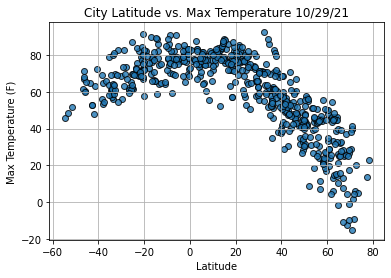

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

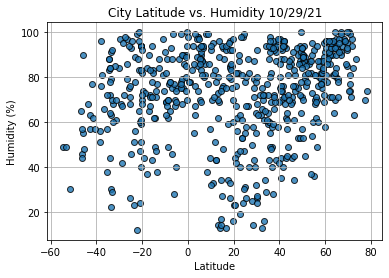

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

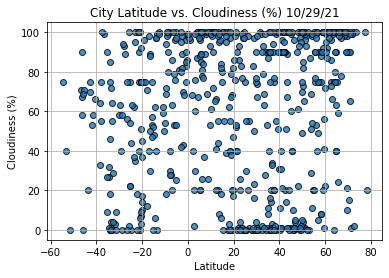

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

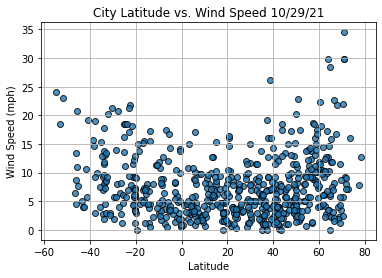

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Korla
Country                        CN
Date          2021-10-29 23:33:47
Lat                       41.7597
Lng                       86.1469
Max Temp                    48.81
Humidity                       40
Cloudiness                    100
Wind Speed                   5.26
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
591     True
592    False
593     True
594     True
595     True
Name: Lat, Length: 596, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Taoudenni,ML,2021-10-29 23:33:45,22.6783,-3.9836,81.48,19,26,8.57
5,Arrifes,PT,2021-10-29 23:33:45,37.7667,-25.7000,70.23,94,75,12.66
7,Los Llanos De Aridane,ES,2021-10-29 23:33:46,28.6585,-17.9182,65.95,79,0,5.01
8,Vila Do Maio,CV,2021-10-29 23:33:46,15.1333,-23.2167,77.79,76,100,15.39
11,Victoria,HK,2021-10-29 23:29:21,22.2855,114.1577,76.32,90,86,4.00


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

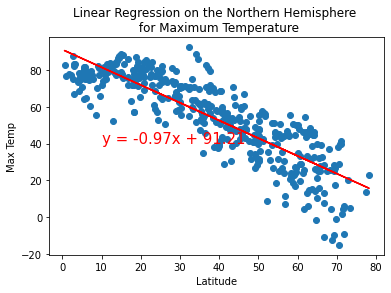

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

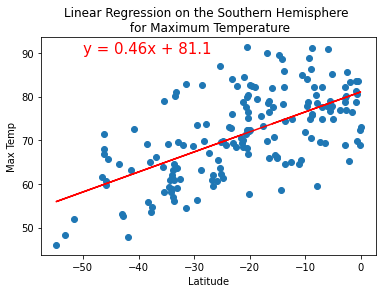

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

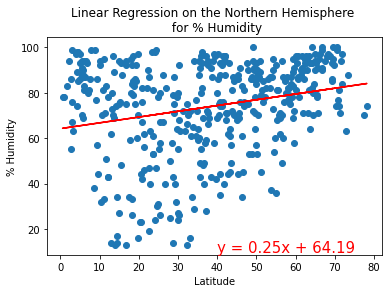

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

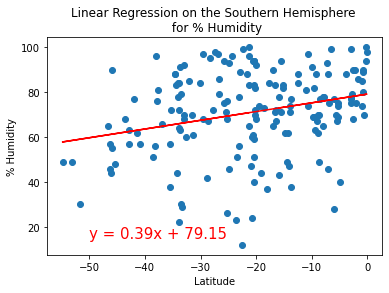

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

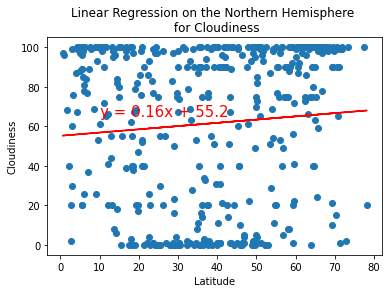

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(10,65))

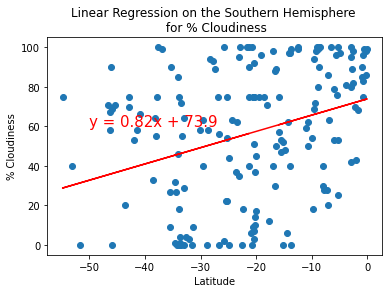

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

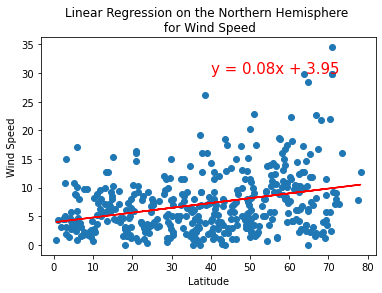

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

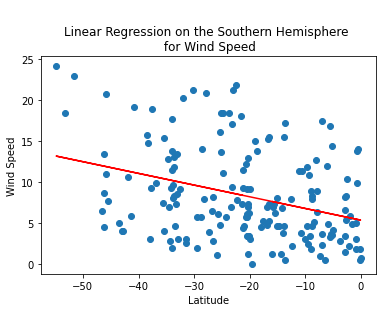

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))